In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# some helper functions
def plot_mats(V, W, H):
    plt.subplot(131)
    plt.imshow(V, cmap='gray')
    plt.title('V')
    
    plt.subplot(132)
    plt.imshow(W, cmap='gray')
    plt.title('W')
        
    plt.subplot(133)
    plt.imshow(H, cmap='gray')
    plt.title('H')
    
def print_summary(fit):
    W = fit.basis()
    H = fit.coef()
    V_fitted = fit.fitted()
    distance = fit.distance()
    # # W = bmf.W
    # print(W.shape)
    # print(H.shape)
    # print(V_fitted.shape)
    print('V:', np.min(V), np.max(V))
    print('W:', np.min(W), np.max(W))
    print('H:', np.min(H), np.max(H))
    print('V-W*H:', np.min(V - V_fitted), np.max(V - V_fitted))
    print('distance =', distance)

## generate some data

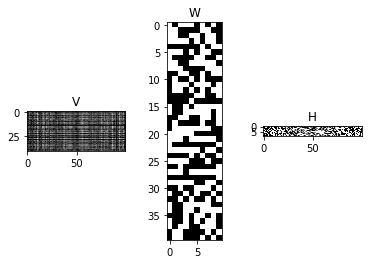

In [3]:
W = np.random.randint(2, size=(40, 10))
H = np.random.randint(2, size=(10, 100))
V = np.dot(W,H)

plot_mats(V, W, H)

## factorize (V=WH)

V: 0 9
W: 2.220446049250313e-16 1.490201010554796
H: 2.220446049250313e-16 0.9479205072533878
V-W*H: -0.008297745528159428 0.006704059983545729
distance = 0.015825122058453944


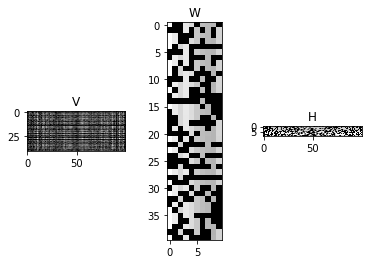

In [4]:
from nimfa.methods.factorization.nmf import Nmf
factorizer = Nmf(seed="nndsvd", rank=10, max_iter=1e5, lambda_w=1.1, lambda_h=1.1)

# from nimfa.methods.factorization.bmf import Bmf
# factorizer = Bmf(seed="nndsvd", rank=10, max_iter=1e5, lambda_w=1.1, lambda_h=1.1)

fit = factorizer(V)
print_summary(fit)

W_est = np.array(fit.basis())
H_est = np.array(fit.coef())
# %run -i using_nimpa.py

plot_mats(V, W_est, H_est)

(array([488.,   0.,   0.,   0.,   0.,   0.,   0., 175., 151., 186.]),
 array([2.22044605e-16, 9.47920507e-02, 1.89584101e-01, 2.84376152e-01,
        3.79168203e-01, 4.73960254e-01, 5.68752304e-01, 6.63544355e-01,
        7.58336406e-01, 8.53128457e-01, 9.47920507e-01]),
 <a list of 10 Patch objects>)

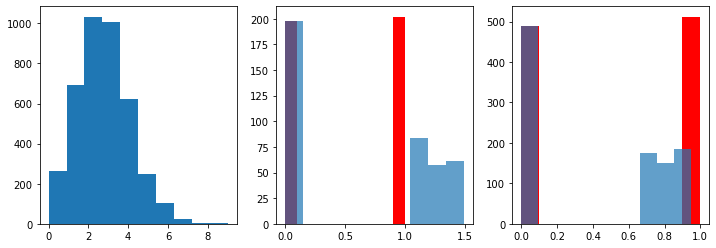

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hist(V.reshape((-1,1)))

plt.subplot(132)
plt.hist(W.reshape((-1,1)), label='true', color='r')
plt.hist(W_est.reshape((-1,1)), label='estimate', alpha=0.7)

plt.subplot(133)
plt.hist(H.reshape((-1,1)), label='true', color='r')
plt.hist(H_est.reshape(-1,1), alpha=0.7)

Text(0, 0.5, 'estimated H')

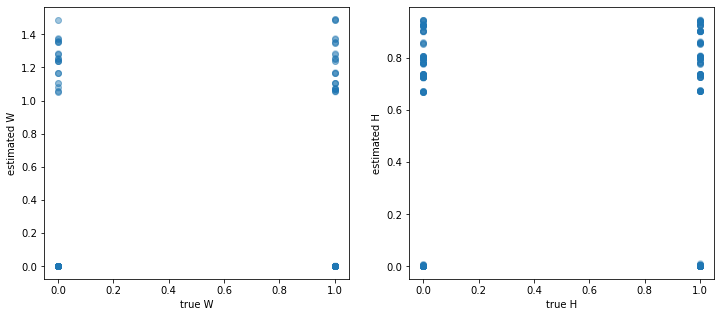

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(W.reshape((-1,1)), W_est.reshape((-1,1)), alpha=0.1)
plt.xlabel('true W')
plt.ylabel('estimated W')
plt.subplot(122)
plt.scatter(H.reshape((-1,1)), H_est.reshape((-1,1)), alpha=0.1)
plt.xlabel('true H')
plt.ylabel('estimated H')

Text(0.5, 0, 'H_est')

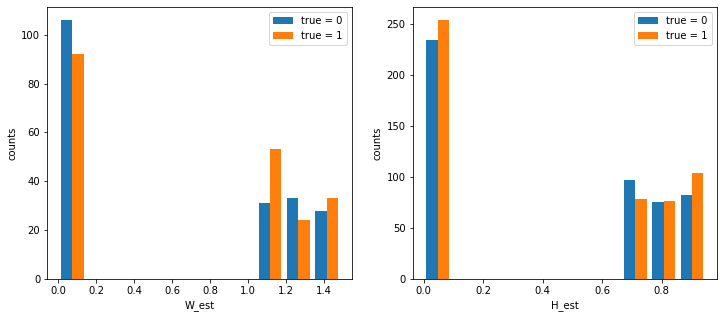

In [7]:
def plot_cond(true, estimate, true_values=(0,1)):
    true = np.asarray(true).reshape(-1,1)
    estimate = np.asarray(estimate).reshape(-1,1)
    
    counts = []
    legends = []
    for val in true_values:
        idx = true == val
        
        counts.append(estimate[idx])
        legends.append('true = {}'.format(val))
    
    plt.hist(counts)
    plt.ylabel('counts')
    plt.legend(legends)
    
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_cond(W, W_est)
plt.xlabel('W_est')

plt.subplot(122)
plot_cond(H, H_est)
plt.xlabel('H_est')
